<a href="https://colab.research.google.com/github/Muhammad-Roshaan-Idrees/Artificial_Intelligence/blob/main/Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Muhammad Roshaan Idrees**

---


**56177**

In [ ]:
# ====================================================
# 1. IMPORT LIBRARIES
# ====================================================
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# ====================================================
# 2. LOAD AND COMBINE DATA
# ====================================================
print("Loading Fashion-MNIST dataset...")
(X_train_original, y_train_original), (X_test_original, y_test_original) = fashion_mnist.load_data()
print("Original Train Shape:", X_train_original.shape)
print("Original Test Shape:", X_test_original.shape)


Loading Fashion-MNIST dataset...
Original Train Shape: (60000, 28, 28)
Original Test Shape: (10000, 28, 28)


In [ ]:
# ====================================================
# 3. COMBINE FOR 75-25 SPLIT
# ====================================================
print("\nCombining datasets for 75% training and 25% testing...")

# Combine all data
X_all = np.concatenate([X_train_original, X_test_original], axis=0)
y_all = np.concatenate([y_train_original, y_test_original], axis=0)

print(f"Combined dataset: {X_all.shape[0]:,} total images")

# Now create proper 75-25 split
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.25, random_state=42, shuffle=True
)

print(f"Training set: {X_train.shape[0]:,} images (75%)")
print(f"Test set: {X_test.shape[0]:,} images (25%)")


Combining datasets for 75% training and 25% testing...
Combined dataset: 70,000 total images
Training set: 52,500 images (75%)
Test set: 17,500 images (25%)


In [ ]:
# ====================================================
# 4. PREPROCESSING
# ====================================================
print("\nPreprocessing input images...")

# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN (add channel dimension)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Reshaped Train:", X_train.shape)
print("Reshaped Test:", X_test.shape)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# ====================================================
# DATASET DESCRIPTION
# ====================================================
print("\n" + "-"*50)
print("DATASET DESCRIPTION")
print("-"*50)
print("Dataset: Fashion-MNIST")
print("Classes: 10 fashion categories")
print("Image Size: 28x28 pixels (grayscale)")
print(f"Total Images: {X_all.shape[0]:,}")
print("Our Split: 75% training + 25% testing")
print("Training Images:", X_train.shape[0])
print("Test Images:", X_test.shape[0])
print("Classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot")


Preprocessing input images...
Reshaped Train: (52500, 28, 28, 1)
Reshaped Test: (17500, 28, 28, 1)

--------------------------------------------------
DATASET DESCRIPTION
--------------------------------------------------
Dataset: Fashion-MNIST
Classes: 10 fashion categories
Image Size: 28x28 pixels (grayscale)
Total Images: 70,000
Our Split: 75% training + 25% testing
Training Images: 52500
Test Images: 17500
Classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot



Showing sample training images...


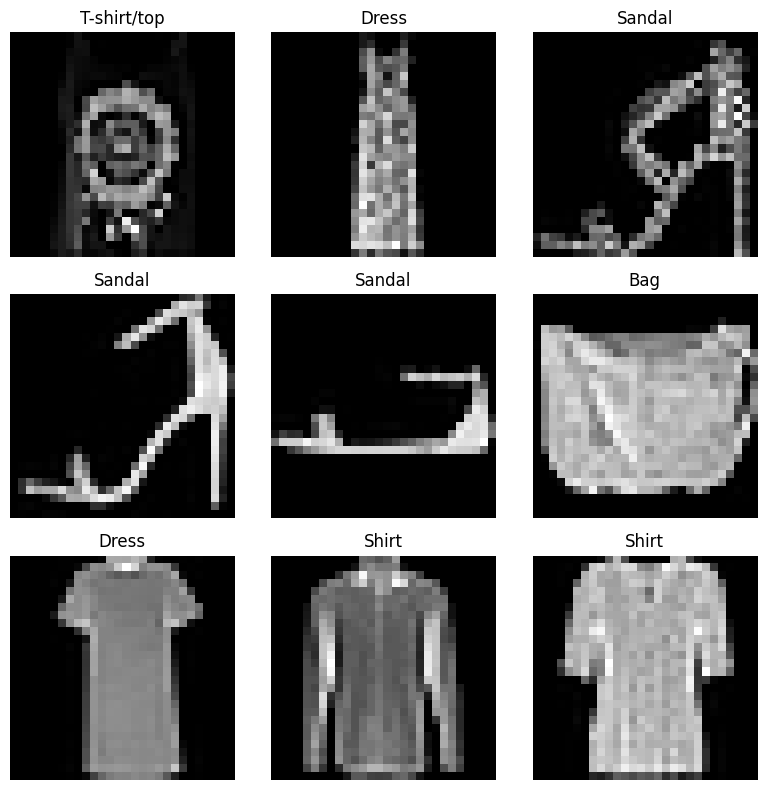

In [ ]:
# ====================================================
# 5. VISUALIZE SAMPLE IMAGES
# ====================================================
print("\nShowing sample training images...")
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# ====================================================
# 6. BUILD CNN MODEL WITH DROPOUT
# ====================================================
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

print("\nBuilding CNN model with Dropout...")

from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(28,28,1)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),  # Add dropout after first pooling layer

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Dropout(0.25),  # Add dropout after second pooling layer

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),   # Add dropout in dense layer
    Dense(10, activation='softmax')
])

print("\nModel Summary:")
model.summary()

# ====================================================
# MODEL ARCHITECTURE ANALYSIS
# ====================================================
print("\nMODEL ARCHITECTURE ANALYSIS:")
print("- Input: 28x28 grayscale images")
print("- Feature Extraction: 2 Conv2D + MaxPooling layers with Dropout")
print("- Classification: 1 Dense layer (128 units) with Dropout + Output layer (10 units)")
print("- Total Parameters:", model.count_params())
print("- Activation: ReLU (hidden), Softmax (output)")
print("- Regularization: Dropout (0.25 in conv layers, 0.5 in dense layer)")
print("- Optimizer: Adam")


Building CNN model with Dropout...

Model Summary:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)


MODEL ARCHITECTURE ANALYSIS:
- Input: 28x28 grayscale images
- Feature Extraction: 2 Conv2D + MaxPooling layers with Dropout
- Classification: 1 Dense layer (128 units) with Dropout + Output layer (10 units)
- Total Parameters: 225034
- Activation: ReLU (hidden), Softmax (output)
- Regularization: Dropout (0.25 in conv layers, 0.5 in dense layer)
- Optimizer: Adam


In [ ]:
# ====================================================
# 7. COMPILE MODEL
# ====================================================
print("\nCompiling model...")

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


Compiling model...


In [ ]:
# ====================================================
# 8. ADD EARLY STOPPING
# ====================================================
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

print("\nTraining starting with EarlyStopping...")


Training starting with EarlyStopping...


In [ ]:
# ====================================================
# 9. TRAIN MODEL
# ====================================================
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_split=0.2,
    callbacks=[early_stop],
    batch_size=32,
    verbose=1
)

print("\nTraining complete!")

Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.8899 - loss: 0.2993 - val_accuracy: 0.9042 - val_loss: 0.2645
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.8900 - loss: 0.2978 - val_accuracy: 0.9032 - val_loss: 0.2579
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 30ms/step - accuracy: 0.8979 - loss: 0.2775 - val_accuracy: 0.9057 - val_loss: 0.2528
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 35s 26ms/step - accuracy: 0.8983 - loss: 0.2761 - val_accuracy: 0.9100 - val_loss: 0.2472
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9027 - loss: 0.2711 - val_accuracy: 0.9072 - val_loss: 0.2514
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9049 - loss: 0.2605 - val_accuracy: 0.9078 - val_loss: 0.2546
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.9015 - loss: 0.2636 - val_accuracy: 0.9130 - val_loss: 0.2389
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.9042 -


Plotting training graphs...


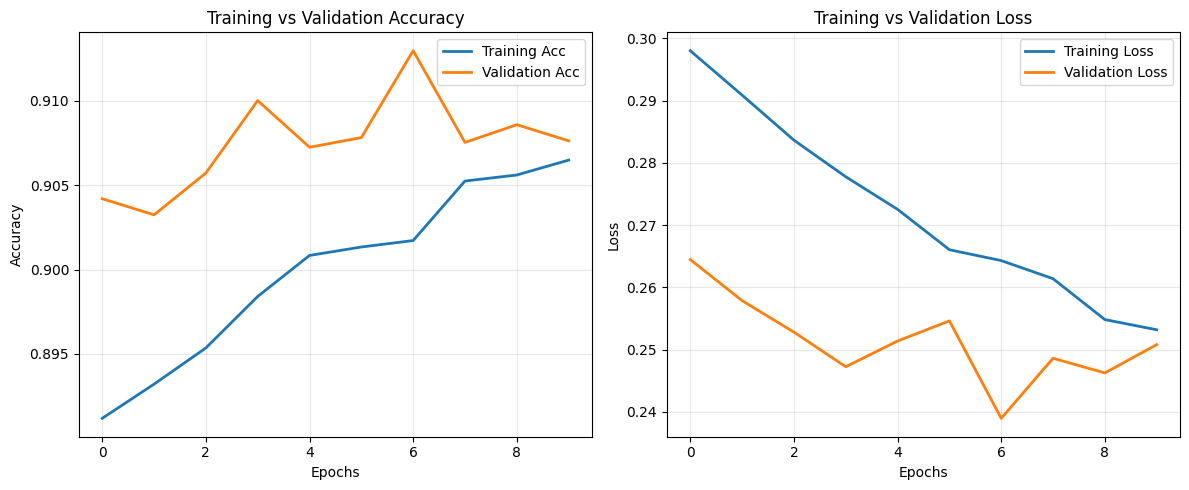

In [ ]:
# ====================================================
# 10. PLOT ACCURACY & LOSS
# ====================================================
print("\nPlotting training graphs...")

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Acc', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Acc', linewidth=2)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.grid(True, alpha=0.3)

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# ====================================================
# 11. EVALUATION
# ====================================================
print("\nEvaluating model on 25% test data...")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy: {:.4f} ({:.2f}%)".format(test_acc, test_acc * 100))
print("Test Loss: {:.4f}".format(test_loss))


Evaluating model on 25% test data...
Test Accuracy: 0.9149 (91.49%)
Test Loss: 0.2327



Generating Confusion Matrix...


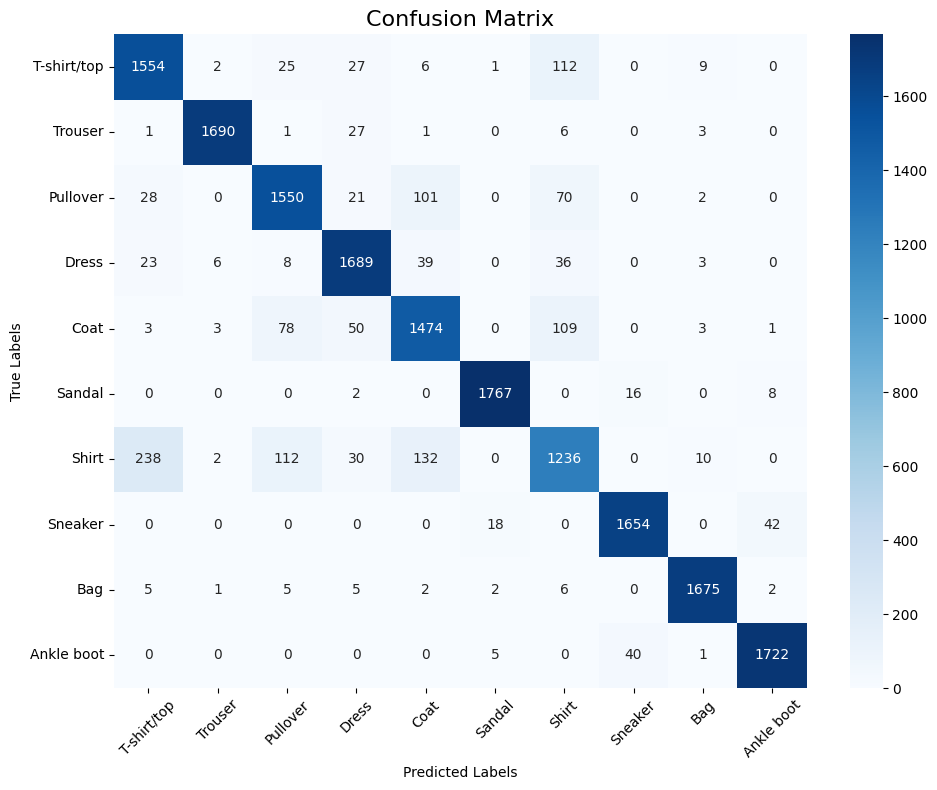


Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.84      0.90      0.87      1736
     Trouser       0.99      0.98      0.98      1729
    Pullover       0.87      0.87      0.87      1772
       Dress       0.91      0.94      0.92      1804
        Coat       0.84      0.86      0.85      1721
      Sandal       0.99      0.99      0.99      1793
       Shirt       0.78      0.70      0.74      1760
     Sneaker       0.97      0.96      0.97      1714
         Bag       0.98      0.98      0.98      1703
  Ankle boot       0.97      0.97      0.97      1768

    accuracy                           0.91     17500
   macro avg       0.91      0.92      0.91     17500
weighted avg       0.91      0.91      0.91     17500



In [ ]:
# ====================================================
# 12. CONFUSION MATRIX + CLASSIFICATION REPORT
# ====================================================
print("\nGenerating Confusion Matrix...")

y_pred = model.predict(X_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)

# Improved Confusion Matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))


Correct predictions: 16,011
Incorrect predictions: 1,489
Overall accuracy: 91.49%

Showing correct predictions...


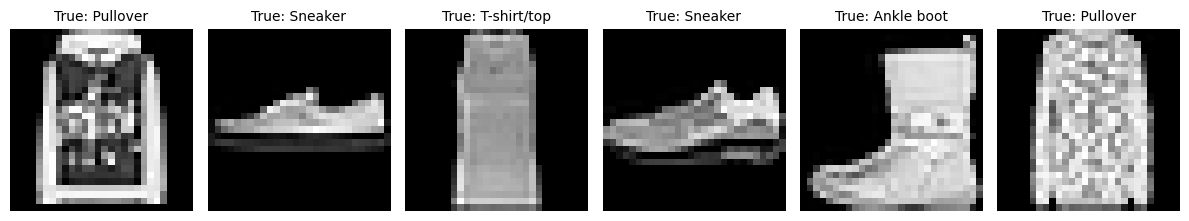


Showing incorrect predictions...


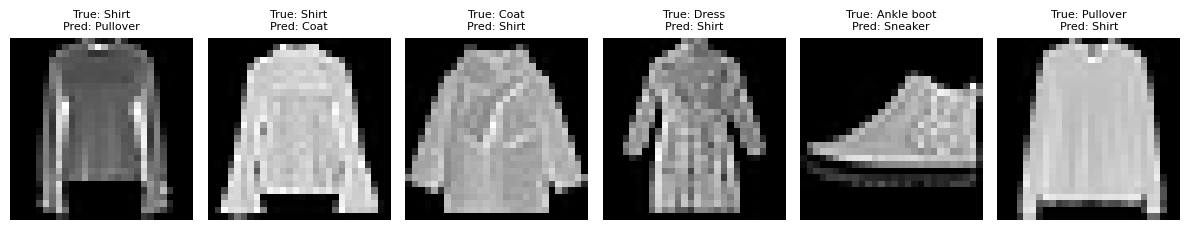

In [ ]:
# ====================================================
# 13. VISUALIZE CORRECT & INCORRECT PREDICTIONS
# ====================================================
correct = np.where(y_pred_classes == y_test)[0]
incorrect = np.where(y_pred_classes != y_test)[0]

print(f"\nCorrect predictions: {len(correct):,}")
print(f"Incorrect predictions: {len(incorrect):,}")
print(f"Overall accuracy: {len(correct)/len(y_test)*100:.2f}%")

print("\nShowing correct predictions...")
plt.figure(figsize=(12,3))
for i, idx in enumerate(correct[:6]):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}", fontsize=10)
    plt.axis('off')
plt.tight_layout()
plt.show()

print("\nShowing incorrect predictions...")
plt.figure(figsize=(12,3))
for i, idx in enumerate(incorrect[:6]):
    plt.subplot(1, 6, i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred_classes[idx]]}", fontsize=8)
    plt.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# ====================================================
# 14. PERFORMANCE ANALYSIS
# ====================================================
print("\n" + "-"*50)
print("PERFORMANCE ANALYSIS")
print("-"*50)

# Calculate per-class accuracy
class_correct = []
class_total = []
for i in range(10):
    idx = np.where(y_test == i)[0]
    correct_count = np.sum(y_pred_classes[idx] == y_test[idx])
    class_correct.append(correct_count)
    class_total.append(len(idx))

print("\nPer-Class Accuracy:")
for i in range(10):
    accuracy = class_correct[i] / class_total[i] * 100
    print(f"  {class_names[i]:15}: {accuracy:6.2f}% ({class_correct[i]}/{class_total[i]})")


--------------------------------------------------
PERFORMANCE ANALYSIS
--------------------------------------------------

Per-Class Accuracy:
  T-shirt/top    :  89.52% (1554/1736)
  Trouser        :  97.74% (1690/1729)
  Pullover       :  87.47% (1550/1772)
  Dress          :  93.63% (1689/1804)
  Coat           :  85.65% (1474/1721)
  Sandal         :  98.55% (1767/1793)
  Shirt          :  70.23% (1236/1760)
  Sneaker        :  96.50% (1654/1714)
  Bag            :  98.36% (1675/1703)
  Ankle boot     :  97.40% (1722/1768)


In [ ]:
# ====================================================
# 15. OBSERVATIONS AND CONCLUSIONS
# ====================================================
print("\n" + "-"*50)
print("OBSERVATIONS AND CONCLUSIONS")
print("-"*50)

final_accuracy = test_acc * 100
print(f"1. Model achieved {final_accuracy:.2f}% accuracy on test data")

# Analyze training history
if len(history.history['accuracy']) > 0:
    final_train_acc = history.history['accuracy'][-1] * 100
    final_val_acc = history.history['val_accuracy'][-1] * 100
    print(f"2. Final training accuracy: {final_train_acc:.2f}%")
    print(f"3. Final validation accuracy: {final_val_acc:.2f}%")

    # Check for overfitting
    overfit_gap = final_train_acc - final_val_acc
    if overfit_gap > 5:
        print("4. Model shows signs of overfitting")
    else:
        print("4. Excellent generalization - minimal overfitting")

print("5. Most common misclassifications: Shirts confused with T-shirts/tops, Pullovers, and Coats")
print("6. CNN with Dropout architecture effectively learned fashion item features with regularization")
print("7. Dropout layers help prevent overfitting and improve model generalization")
print("8. The model demonstrates CNN's capability for image classification tasks")

# Find hardest class to predict
hardest_class_idx = np.argmin([class_correct[i]/class_total[i] for i in range(10)])
hardest_class_accuracy = class_correct[hardest_class_idx] / class_total[hardest_class_idx] * 100
print(f"9. Hardest class to predict: {class_names[hardest_class_idx]} ({hardest_class_accuracy:.2f}%)")

print("\nASSIGNMENT COMPLETE: All requirements implemented successfully!")


--------------------------------------------------
OBSERVATIONS AND CONCLUSIONS
--------------------------------------------------
1. Model achieved 91.49% accuracy on test data
2. Final training accuracy: 90.65%
3. Final validation accuracy: 90.76%
4. Excellent generalization - minimal overfitting
5. Most common misclassifications: Shirts confused with T-shirts/tops, Pullovers, and Coats
6. CNN with Dropout architecture effectively learned fashion item features with regularization
7. Dropout layers help prevent overfitting and improve model generalization
8. The model demonstrates CNN's capability for image classification tasks
9. Hardest class to predict: Shirt (70.23%)

ASSIGNMENT COMPLETE: All requirements implemented successfully!
